# EDA _ train, val

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML

from datasets import load_metric, load_from_disk, Dataset, DatasetDict

### dataset
![dataset.png](/opt/ml/code/assets/dataset.png)
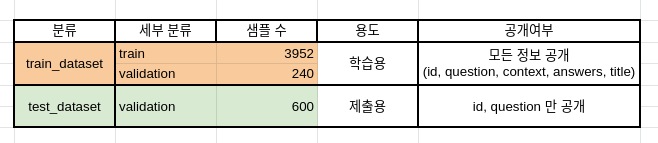

## 데이터 불러오기

In [2]:
cd ..

/opt/ml


In [3]:
datasets = load_from_disk("./data/train_dataset")

In [4]:
datasets

DatasetDict({
    train: Dataset({
        features: ['__index_level_0__', 'answers', 'context', 'document_id', 'id', 'question', 'title'],
        num_rows: 3952
    })
    validation: Dataset({
        features: ['__index_level_0__', 'answers', 'context', 'document_id', 'id', 'question', 'title'],
        num_rows: 240
    })
})

In [5]:
train = datasets['train']
val = datasets['validation']

In [6]:
train

Dataset({
    features: ['__index_level_0__', 'answers', 'context', 'document_id', 'id', 'question', 'title'],
    num_rows: 3952
})

In [7]:
val

Dataset({
    features: ['__index_level_0__', 'answers', 'context', 'document_id', 'id', 'question', 'title'],
    num_rows: 240
})

In [8]:
train_df = pd.DataFrame(train)
val_df = pd.DataFrame(val)

In [9]:
train_df

,title,context,question,id,answers,document_id,__index_level_0__
0,미국 상원,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...,대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,mrc-1-000067,"{'answer_start': [235], 'text': ['하원']}",18293,42
1,인사조직관리,'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 19...,현대적 인사조직관리의 시발점이 된 책은?,mrc-0-004397,"{'answer_start': [212], 'text': ['《경영의 실제》']}",51638,2873
2,강희제,강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...,강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,mrc-1-000362,"{'answer_start': [510], 'text': ['백성']}",5028,230
3,금동삼존불감,"불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든...",11~12세기에 제작된 본존불은 보통 어떤 나라의 특징이 전파되었나요?,mrc-0-001510,"{'answer_start': [625], 'text': ['중국']}",34146,992
4,계사명 사리구,동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기...,명문이 적힌 유물을 구성하는 그릇의 총 개수는?,mrc-0-000823,"{'answer_start': [30], 'text': ['4개']}",47334,548
...,...,...,...,...,...,...,...
3947,이오 (위성),이오의 산\n이오의 산 목록\n 이오에는 100~150개의 산이 있다. 이들 산의 ...,대부분의 이오의 산이 형성되는데 영향을 끼친 것은?,mrc-0-005285,"{'answer_start': [317], 'text': ['지질 구조']}",8275,3445
3948,내니 다이어리,애니의 고군분투 뉴욕 입성기!!\n\n인류학자가 꿈인 21살 소녀 '애니(스칼렛 요...,애니는 어디서 태어났는가?,mrc-1-000699,"{'answer_start': [616], 'text': ['뉴저지']}",37764,450
3949,빈 필하모니 관현악단,1842년에 작곡가이자 지휘자인 오토 니콜라이가 빈 궁정 오페라극장 소속 관현악단을...,1854년에 니콜라이의 뒤를 이어 상임 지휘자로서 활동한 인물은?,mrc-0-003429,"{'answer_start': [255], 'text': ['칼 에케르트']}",12730,2252
3950,드래곤,원어는 고대 그리스어까지 거슬러 올라간다. 영어 문헌에 이 말이 나타나기 시작한 것...,드래곤의 암수 구분이 있는 신화는?,mrc-0-003956,"{'answer_start': [476], 'text': ['슬라브 신화']}",10924,2595


## context, answer 길이 확인

### train, val의 context 길이

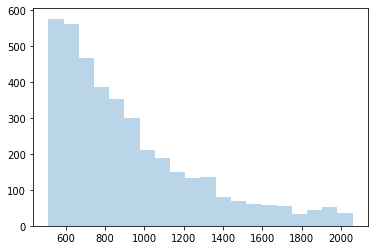

In [10]:
# train의 context 길이
train_context_len = [len(train_df['context'][i]) for i in range(len(train_df))]

plt.hist(train_context_len, bins=20, alpha=.3)
plt.show()

In [11]:
print('가장 긴 train context 길이 : ', max(train_context_len))
print('train context 길이의 평균 : ', sum(train_context_len) / len(train_context_len))
print('가장 짧은 train context 길이 : ', min(train_context_len))

가장 긴 train context 길이 :  2059
train context 길이의 평균 :  920.2206477732793
가장 짧은 train context 길이 :  512


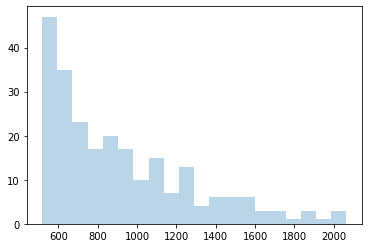

In [12]:
# val의 context 길이
val_context_len = [len(val_df['context'][i]) for i in range(len(val_df))]

plt.hist(val_context_len, bins=20, alpha=.3)
plt.show()

In [13]:
print('가장 긴 val context 길이 : ', max(val_context_len))
print('val context 길이의 평균 : ', sum(val_context_len) / len(val_context_len))
print('가장 짧은 val context 길이 : ', min(val_context_len))

가장 긴 val context 길이 :  2064
val context 길이의 평균 :  916.725
가장 짧은 val context 길이 :  517


### train, val의 answer 길이

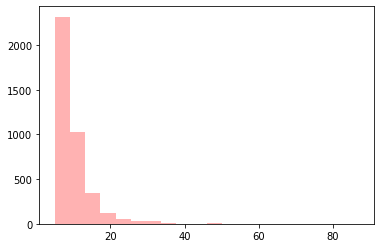

In [14]:
# train의 answer 길이
train_answer_len = [len(str(train_df['answers'][i]['text'])) for i in range(len(train_df))]

plt.hist(train_answer_len, bins=20, alpha=.3, color='r')
plt.show()

In [15]:
print('가장 긴 train answer 길이 : ', max(train_answer_len))
print('train answer 길이의 평균 : ', sum(train_answer_len) / len(train_answer_len))
print('가장 짧은 train answer 길이 : ', min(train_answer_len))

가장 긴 train answer 길이 :  87
train answer 길이의 평균 :  10.276568825910932
가장 짧은 train answer 길이 :  5


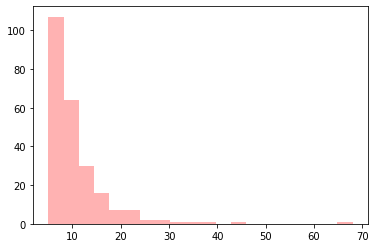

In [16]:
# val의 answer 길이
val_answer_len = [len(str(val_df['answers'][i]['text'])) for i in range(len(val_df))]

plt.hist(val_answer_len, bins=20, alpha=.3, color='r')
plt.show()

In [17]:
print('가장 긴 val answer 길이 : ', max(val_answer_len))
print('val answer 길이의 평균 : ', sum(val_answer_len) / len(val_answer_len))
print('가장 짧은 val answer 길이 : ', min(val_answer_len))

가장 긴 val answer 길이 :  68
val answer 길이의 평균 :  10.9125
가장 짧은 val answer 길이 :  5


### 길이가 20 이하인 answer만 다시 뽑아서 그래프 그리기 

In [18]:
train_ans_20 = []
val_ans_20 = []

for item in train_answer_len :
    if item <= 20 :
        train_ans_20.append(item)
        
for item in val_answer_len :
    if item <= 20 :
        val_ans_20.append(item)

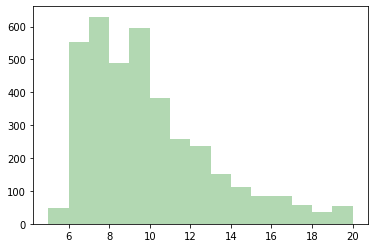

In [19]:
# train의 answer 길이 20 이하
plt.hist(train_ans_20, bins=15, alpha=.3, color='g')
plt.show()

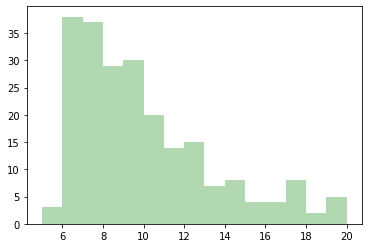

In [20]:
# val의 answer 길이 20 이하
plt.hist(val_ans_20, bins=15, alpha=.3, color='g')
plt.show()

### train, val의 title 길이

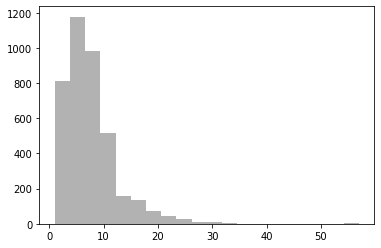

In [21]:
# train의 title                                                                                                                                                                                                                                                                                                                                                                                                                                                      길이
train_title_len = [len(str(train_df['title'][i])) for i in range(len(train_df))]

plt.hist(train_title_len, bins=20, alpha=.3, color='black')
plt.show()

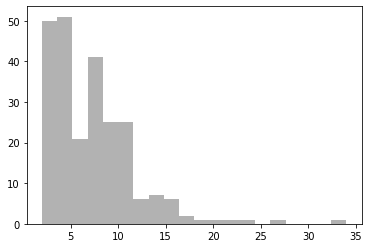

In [22]:
# val의 title                                                                                                                                                                                                                                                                                                                                                                                                                                                      길이
val_title_len = [len(str(val_df['title'][i])) for i in range(len(val_df))]

plt.hist(val_title_len, bins=20, alpha=.3, color='black')
plt.show()

### train, val의 question 길이

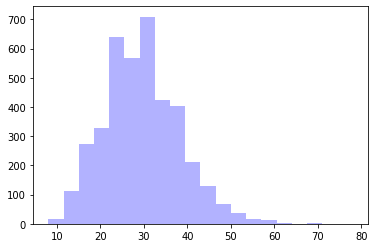

In [23]:
train_question_len = [len(str(train_df['question'][i])) for i in range(len(train_df))]

plt.hist(train_question_len, bins=20, alpha=.3, color='blue')
plt.show()

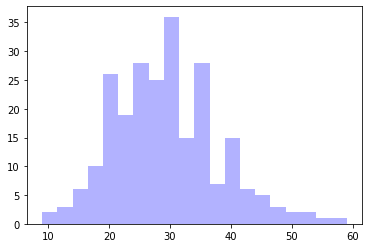

In [24]:
val_question_len = [len(str(val_df['question'][i])) for i in range(len(val_df))]

plt.hist(val_question_len, bins=20, alpha=.3, color='blue')
plt.show()

## 정답이 context에 있는지 확실히 확인하기

In [25]:
train_context = train_df['context']
val_context = val_df['context']

In [26]:
# answer(text) = list 이므로 str로 바꾸어 append
train_answer = [''.join(train_df['answers'][i]['text']) for i in range(len(train_df))]
val_answer = [''.join(val_df['answers'][i]['text']) for i in range(len(val_df))]

In [27]:
train_ans_in_ctx = []

for idx in range(len(train_df)) :
    if train_answer[idx] in train_context[idx] :
        train_ans_in_ctx.append(True)
    else :
        train_ans_in_ctx.append(False)

In [28]:
val_ans_in_ctx = []

for idx in range(len(val_df)) :
    if val_answer[idx] in val_context[idx] :
        val_ans_in_ctx.append(True)
    else :
        val_ans_in_ctx.append(False)

In [29]:
print('error') if False in train_ans_in_ctx else print('great')
print('error') if False in val_ans_in_ctx else print('great')

great
great


## answer가 여러 개인 경우 확인

In [30]:
# 1. train, val의 answer(text)가 여러 개인지 확인
train_answer_chk = [len(train_df['answers'][i]['text']) for i in range(len(train_df))]
val_answer_chk = [len(val_df['answers'][i]['text']) for i in range(len(val_df))]

In [31]:
print(len(list(set(train_answer_chk))), len(list(set(val_answer_chk))))

1 1


In [32]:
# 2. context 안에 answer가 여러 개 인지 확인
train_ctx_ans_count = []

for idx in range(len(train_df)) :
    train_ctx_ans_count.append(train_context[idx].count(train_answer[idx]))

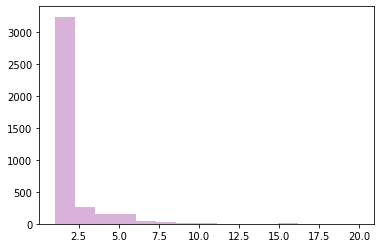

In [33]:
plt.hist(train_ctx_ans_count, bins=15, alpha=.3, color='purple')
plt.show()

In [34]:
# context 안에 answer가 가장 많이 포함되어있는 데이터 꺼내보기
train_ans_max = train_ctx_ans_count.index(max(train_ctx_ans_count))

print('The answer is ... ', train_answer[train_ans_max])
train_context[train_ans_max].replace(train_answer[train_ans_max], "♥" + train_answer[train_ans_max] + "♥")

The answer is ...  주영걸


'1974년, 남베트남 사이공의 떤선녓 국제공항에 한 남자가 도착한다. 그의 이름은 마크. 마크는 사촌인 아민과 삼촌을 홍콩으로 데려오기 위해 온 것이었다. 공항에서 미모의 여성 ♥주영걸♥과 우연히 마주치고 도와주게 된다. 사이공에서 약방을 운영하는 마크의 삼촌은 초팔이라는 남베트남 소년을 돌보고 있었다. 마크와 다시 만난 ♥주영걸♥은 아민과 삼촌을 홍콩으로 갈 수 있도록 도와주며 친구가 된다. 마크와 아민은 ♥주영걸♥의 마음씨와 외모에 반하여 삼각관계에 처한다. 그러나 그녀는 상사인 하장청의 종용으로 사이공에 남는다.\\n\\n얼마 후 ♥주영걸♥은 홍콩에 있는 마크와 아민을 찾아와 즐거운 한때를 보내지만 마크의 모습을 보고 실망한다. 그날 밤 ♥주영걸♥은 마크에게 선글라스와 코트를 선물하고 떠난다. ♥주영걸♥에게 마음이 있는 하장청은 마크와 ♥주영걸♥의 관계를 알아채고, 얼마 후 홍콩으로 가서 카센터를 운영하던 마크의 삼촌을 폭탄으로 살해한 후 마크와 아민에게 홍콩을 떠날 것을 요구한다.\\n\\n♥주영걸♥이 사이공으로 돌아간 것을 안 마크와 아민은 ♥주영걸♥을 찾기 위해 사이공으로 다시 돌아간다. 베트남 전쟁에서 남베트남은 더욱 열세에 몰려 사이공은 함락 직전이었고, 약방에서 살던 초팔은 군인이 되었다. 마크와 아민은 초팔과 함께 사이공 시내를 돌아다니며 ♥주영걸♥을 찾아다닌다. 아민은 ♥주영걸♥과 다시 만났지만 베트민 군대의 총격으로 죽을 뻔 하고, 아민이 죽은 줄로 오해한 마크는 ♥주영걸♥을 죽도록 미워하게 된다.\\n\\n얼마 후 하장청과 함께 상방을 만나러 간 ♥주영걸♥은 시한폭탄을 숨기고 있었다. 상방과 하장청이 싸우는 도중 ♥주영걸♥의 시한폭탄이 폭발하고, 얼마 안 가 마크가 나타나서 하장청과 결투를 벌이지만, ♥주영걸♥은 하장청의 집사의 총에 치명상을 입고 쓰러진다. 하장청도 상방의 총탄에 온몸이 벌집이 되며 절명한다. 베트민과의 대면에서도 살아남은 아민은 마크, 초팔과 함께 상방과 싸운다.\\n\\n상방의 탱크를 폭파시킨 그들은 목숨이 위험한

In [35]:
# 질문이 궁금해서 출력
train_question = train_df['question']
train_question[train_ans_max]

'사촌 관계인 두 인물과 삼각관계에 처한 인물은?'

# answer NER

## Pororo

https://kakaobrain.github.io/pororo/notes/intro.html

https://saea.tistory.com/16

1. 가상환경 만들기
* ) conda create --name pororo python=3.6   dasol이 정한 가상환경 이름 ... 원하는 대로 바꾸기

    * ) 가상환경 목록 확인

    conda info --envs

    * ) 가상환경 삭제

    conda remove -n 가상환경이름 --all

2. 가상환경 활성화

* ) source activate pororo

3. 파이토치 설치

* ) conda install pytorch==1.6.0 torchvision==0.7.0 -c pytorch

4. fariseq 설치

* ) pip install fairseq

    * ) fariseq 설치한 뒤 파이썬 버전 확인 -> 1.6.0 이라면 성공 !

    * ) python -c "import torch; print(torch.__version__)"

5. pororo 설치

* ) pip install pororo

In [54]:
from pororo import Pororo

In [55]:
ner = Pororo(task="ner", lang="ko")

### train _ 우선 바로 적용 

In [58]:
train_answer_NER = [ner(train_answer[idx]) for idx in range(len(train_df))]

In [92]:
pororo_default = []

for item in train_answer_NER :
    result = ''
    for pred in item :
        if pred[1] != 'O' :
            result += " {}({})".format(pred[0], pred[1])
        else :
            if pred[0] != ' ' :
                result += (' ' + pred[0])
    pororo_default.append(result.lstrip())    

토크나이저 -> ner
'O' 추가

In [93]:
pororo_default

['하원(ORGANIZATION)',
 '《 경영의 실제(ARTIFACT) 》',
 '백성(CIVILIZATION)',
 '중국(COUNTRY)',
 '4개(QUANTITY)',
 '드래곤(PERSON)',
 '형양태수(CIVILIZATION) 왕식(PERSON)',
 '이탈리아군(ORGANIZATION)',
 '큰아들(CIVILIZATION) 유(PERSON)',
 '왕대마을(LOCATION)',
 '음독자살',
 '출장 잦은 건축가(OCCUPATION)',
 '반신화적인 인물인 우파',
 '1951년(DATE)',
 '예수(PERSON)',
 "'초일기'",
 '1916년(DATE)',
 '레드삭스(ORGANIZATION)',
 '삼판동(LOCATION)',
 '다산 정약용(PERSON)',
 '대나라(DATE)',
 '10달러(QUANTITY)',
 '1945년(DATE)',
 '사립 김노인 고등학교(ORGANIZATION)',
 '체벽에 잇는 감지기(TERM)',
 '근대철학(STUDY_FIELD)',
 '215km(QUANTITY)',
 '마커트리로 장식을 한 트롱프 뢰유(PERSON)',
 '아르투로(PERSON)',
 '조립 라인',
 '우전왕(CIVILIZATION) (優塡王)식 착의법',
 '친구(CIVILIZATION)',
 '2015년(DATE)',
 '케이스 커크(PERSON)',
 '직사각형(TERM)',
 '상인(OCCUPATION)',
 '중국(COUNTRY)',
 '지상요원(CIVILIZATION) 들',
 '시조(CIVILIZATION) 거인',
 "' 발라즈 찬 카이이(ARTIFACT) '",
 '1964년 12월 12일(DATE)',
 'NADPH(ORGANIZATION)',
 '그리고리(PERSON) 신부(CIVILIZATION) (Father(PERSON) Gr(PERSON) igori)',
 '헌법(CIVILIZATION) 제12조(QUANTITY) 제3항(QUANTITY)',
 '1907년까지(DATE)',
 '부근 북

### train _ 띄어쓰기를 기준으로 잘라 줘보자

In [169]:
pororo_split = []

for answer in train_answer :
    text = answer.split()
    result = ''
    for t in text :
        pred = ner(t)
        if pred[0][1] != 'O' :
            result += " {}({})".format(pred[0][0], pred[0][1])
        else :
            result += ' ' + pred[0][0]
    pororo_split.append(result.lstrip())

In [105]:
pororo_split

['하원(ORGANIZATION)',
 '경영의 실제',
 '백성(CIVILIZATION)',
 '중국(COUNTRY)',
 '4개(QUANTITY)',
 '드래곤(PERSON)',
 '형양태수(CIVILIZATION) 왕식(CIVILIZATION)',
 '이탈리아군(ORGANIZATION)',
 '큰아들(CIVILIZATION) 유',
 '왕대마을(LOCATION)',
 '음독자살',
 '출장 잦은 건축가(OCCUPATION)',
 '반신화적인 인물인 우파',
 '1951년(DATE)',
 '예수(PERSON)',
 "'초일기'",
 '1916년(DATE)',
 '레드삭스(ORGANIZATION)',
 '삼판동(LOCATION)',
 '다산(PERSON) 정약용(PERSON)',
 '대나라(DATE)',
 '10달러(QUANTITY)',
 '1945년(DATE)',
 '사립 김노인(PERSON) 고등학교',
 '체벽에 잇는 감지기(TERM)',
 '근대철학(STUDY_FIELD)',
 '215km(QUANTITY)',
 '마커트리(PERSON) 장식을 한 트롱프(PERSON) 뢰유(PERSON)',
 '아르투로(PERSON)',
 '조립 라인',
 '우전왕(CIVILIZATION) 착의법(CIVILIZATION)',
 '친구(CIVILIZATION)',
 '2015년(DATE)',
 '케이스 커크(PERSON)',
 '직사각형(TERM)',
 '상인(OCCUPATION)',
 '중국(COUNTRY)',
 '지상요원(CIVILIZATION)',
 '시조(STUDY_FIELD) 거인',
 "' 찬 카이이(PERSON)",
 '1964년(DATE) 12월(DATE) 12일(DATE)',
 'NADPH(ORGANIZATION)',
 '그리고리 신부(CIVILIZATION) Grigori(PERSON)',
 '헌법(CIVILIZATION) 제12조(QUANTITY) 제3항(QUANTITY)',
 '1907년까지(DATE)',
 '부근 북동부(TERM)',
 '덱',


### train _ default와 split 분석

In [157]:
# 총 몇개의 태그가 달렸는지 세보기
pororo_default_cnt, pororo_split_cnt = 0, 0

for idx in range(len(train_df)) :
    pororo_default_cnt += pororo_default[idx].count('(')
    pororo_split_cnt += pororo_split[idx].count('(')

print(pororo_default_cnt, pororo_split_cnt)

4075 4364


In [158]:
# 데이터프레임으로 만들기
train_ans_default_NER_df = pd.DataFrame({'PERSON' : [item.count('PERSON') for item in pororo_default],
                                         'LOCATION' : [item.count('LOCATION') for item in pororo_default], 
                                         'ORGANIZATION' : [item.count('ORGANIZATION') for item in pororo_default], 
                                        'ARTIFACT' : [item.count('ARTIFACT') for item in pororo_default], 
                                        'DATE' : [item.count('DATE') for item in pororo_default], 
                                        'TIME' : [item.count('TIME') for item in pororo_default], 
                                        'CIVILIZATION' : [item.count('CIVILIZATION') for item in pororo_default], 
                                        'ANIMAL' : [item.count('ANIMAL') for item in pororo_default], 
                                        'PLANT' : [item.count('PLANT') for item in pororo_default], 
                                        'QUANTITY' : [item.count('QUANTITY') for item in pororo_default], 
                                        'STUDY_FIELD' : [item.count('STUDY_FIELD') for item in pororo_default], 
                                        'THEORY' : [item.count('THEORY') for item in pororo_default], 
                                        'EVENT' : [item.count('EVENT') for item in pororo_default], 
                                        'MATERIAL' : [item.count('MATERIAL') for item in pororo_default],
                                        'TERM' : [item.count('TERM') for item in pororo_default]})


In [155]:
train_ans_default_NER_df

,PERSON,LOCATION,ORGANIZATION,ARTIFACT,DATE,TIME,CIVILIZATION,ANIMAL,PLANT,QUANTITY,STUDY_FIELD,THEORY,EVENT,MATERIAL,TERM
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3947,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3948,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3949,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3950,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [134]:
train_ans_split_NER_df = pd.DataFrame({'PERSON' : [item.count('PERSON') for item in pororo_split],
                                    'LOCATION' : [item.count('LOCATION') for item in pororo_split], 
                                    'ORGANIZATION' : [item.count('ORGANIZATION') for item in pororo_split], 
                                    'ARTIFACT' : [item.count('ARTIFACT') for item in pororo_split], 
                                    'DATE' : [item.count('DATE') for item in pororo_split], 
                                    'TIME' : [item.count('TIME') for item in pororo_split], 
                                    'CIVILIZATION' : [item.count('CIVILIZATION') for item in pororo_split], 
                                    'ANIMAL' : [item.count('ANIMAL') for item in pororo_split], 
                                    'PLANT' : [item.count('PLANT') for item in pororo_split], 
                                    'QUANTITY' : [item.count('QUANTITY') for item in pororo_split], 
                                    'STUDY_FIELD' : [item.count('STUDY_FIELD') for item in pororo_split], 
                                    'THEORY' : [item.count('THEORY') for item in pororo_split], 
                                    'EVENT' : [item.count('EVENT') for item in pororo_split], 
                                    'MATERIAL' : [item.count('MATERIAL') for item in pororo_split],
                                    'TERM' : [item.count('TERM') for item in pororo_split]})


In [135]:
train_ans_split_NER_df

,PERSON,LOCATION,ORGANIZATION,ARTIFACT,DATE,TIME,CIVILIZATION,ANIMAL,PLANT,QUANTITY,STUDY_FIELD,THEORY,EVENT,MATERIAL,TERM
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3947,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3948,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3949,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3950,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


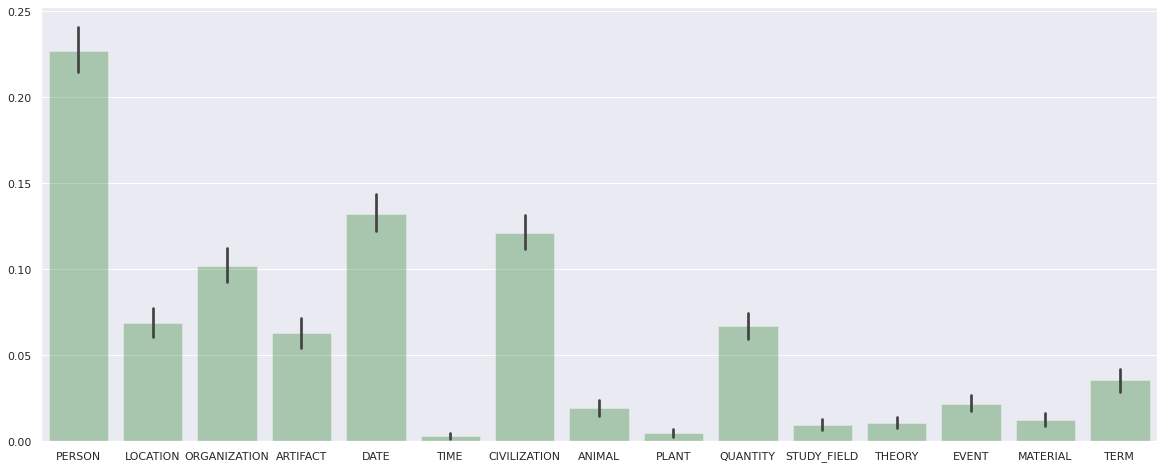

In [156]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(20,8)})
sns.barplot(data=train_ans_default_NER_df, alpha=0.3, color='green')
plt.show()


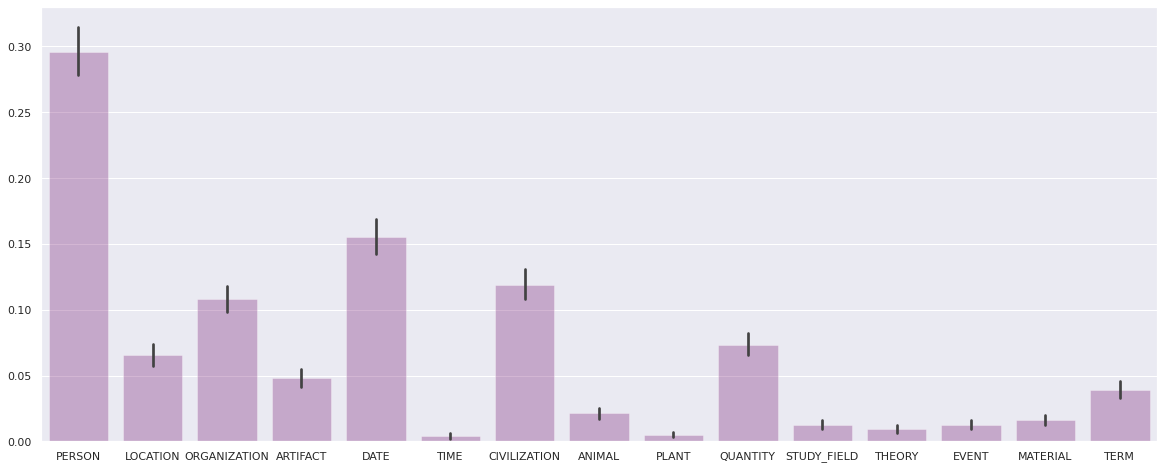

In [154]:
sns.set(rc = {'figure.figsize':(20,8)})
sns.barplot(data=train_ans_split_NER_df, alpha=0.3, color='purple')
plt.show()


### val _ default, split 해주기

In [56]:
val_answer_NER = [ner(val_answer[idx]) for idx in range(len(val_df))]

In [159]:
val_pororo_default = []

for item in val_answer_NER :
    result = ''
    for pred in item :
        if pred[1] != 'O' :
            result += " {}({})".format(pred[0], pred[1])
        else :
            if pred[0] != ' ' :
                result += (' ' + pred[0])
    val_pororo_default.append(result.lstrip())    

In [162]:
val_pororo_split = []

for answer in val_answer :
    text = answer.split()
    result = ''
    for t in text :
        pred = ner(t)
        if pred[0][1] != 'O' :
            result += " {}({})".format(pred[0][0], pred[0][1])
        else :
            result += ' ' + pred[0][0]
    val_pororo_split.append(result.lstrip())

In [164]:
# 총 몇개의 태그가 달렸는지 세보기
val_pororo_default_cnt, val_pororo_split_cnt = 0, 0

for idx in range(len(val_df)) :
    val_pororo_default_cnt += val_pororo_default[idx].count('(')
    val_pororo_split_cnt += val_pororo_split[idx].count('(')

print(val_pororo_default_cnt, val_pororo_split_cnt)

242 246


In [165]:
val_ans_default_NER_df = pd.DataFrame({'PERSON' : [item.count('PERSON') for item in val_pororo_default],
                                         'LOCATION' : [item.count('LOCATION') for item in val_pororo_default], 
                                         'ORGANIZATION' : [item.count('ORGANIZATION') for item in val_pororo_default], 
                                        'ARTIFACT' : [item.count('ARTIFACT') for item in val_pororo_default], 
                                        'DATE' : [item.count('DATE') for item in val_pororo_default], 
                                        'TIME' : [item.count('TIME') for item in val_pororo_default], 
                                        'CIVILIZATION' : [item.count('CIVILIZATION') for item in val_pororo_default], 
                                        'ANIMAL' : [item.count('ANIMAL') for item in val_pororo_default], 
                                        'PLANT' : [item.count('PLANT') for item in val_pororo_default], 
                                        'QUANTITY' : [item.count('QUANTITY') for item in val_pororo_default], 
                                        'STUDY_FIELD' : [item.count('STUDY_FIELD') for item in val_pororo_default], 
                                        'THEORY' : [item.count('THEORY') for item in val_pororo_default], 
                                        'EVENT' : [item.count('EVENT') for item in val_pororo_default], 
                                        'MATERIAL' : [item.count('MATERIAL') for item in val_pororo_default],
                                        'TERM' : [item.count('TERM') for item in val_pororo_default]})

In [166]:
val_ans_split_NER_df = pd.DataFrame({'PERSON' : [item.count('PERSON') for item in val_pororo_split],
                                    'LOCATION' : [item.count('LOCATION') for item in val_pororo_split], 
                                    'ORGANIZATION' : [item.count('ORGANIZATION') for item in val_pororo_split], 
                                    'ARTIFACT' : [item.count('ARTIFACT') for item in val_pororo_split], 
                                    'DATE' : [item.count('DATE') for item in val_pororo_split], 
                                    'TIME' : [item.count('TIME') for item in val_pororo_split], 
                                    'CIVILIZATION' : [item.count('CIVILIZATION') for item in val_pororo_split], 
                                    'ANIMAL' : [item.count('ANIMAL') for item in val_pororo_split], 
                                    'PLANT' : [item.count('PLANT') for item in val_pororo_split], 
                                    'QUANTITY' : [item.count('QUANTITY') for item in val_pororo_split], 
                                    'STUDY_FIELD' : [item.count('STUDY_FIELD') for item in val_pororo_split], 
                                    'THEORY' : [item.count('THEORY') for item in val_pororo_split], 
                                    'EVENT' : [item.count('EVENT') for item in val_pororo_split], 
                                    'MATERIAL' : [item.count('MATERIAL') for item in val_pororo_split],
                                    'TERM' : [item.count('TERM') for item in val_pororo_split]})

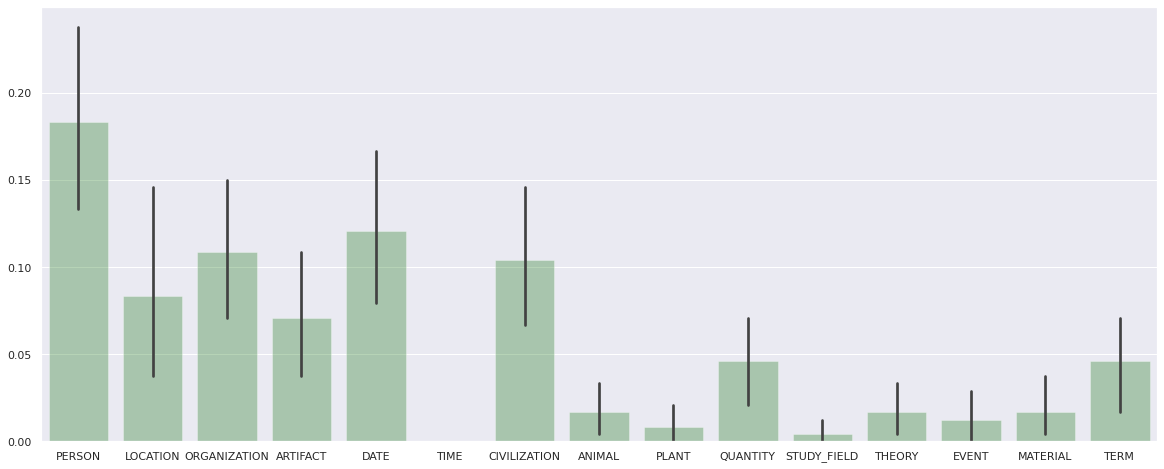

In [167]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(20,8)})
sns.barplot(data=val_ans_default_NER_df, alpha=0.3, color='green')
plt.show()


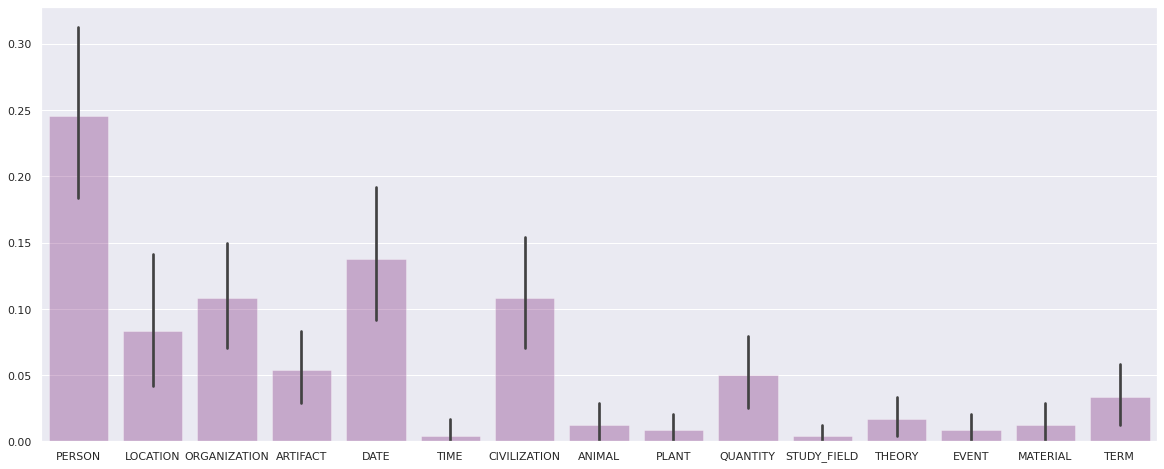

In [195]:
sns.set(rc = {'figure.figsize':(20,8)})
sns.barplot(data=val_ans_split_NER_df, alpha=0.3, color='purple')
plt.show()
